In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn import linear_model
import sys


# Problem 2 a)

In [2]:
#Part 1

datafile1 = open(sys.argv[1], 'r')  #sys.argv[1]
output=sys.argv[2]
k=sys.argv[3]
model=sys.argv[4]

df= pd.read_csv(datafile1)

,house_value,Crime_Rate,Charles_river_bound,num_of_rooms,dist_to_employment_center,property_tax_rate,student_teacher_ratio,Nitric_Oxides,accessiblity_to_highway
307,293000,0.0529,No,7,3.1827,222,18.4,0.472,7
343,254000,0.0236,No,7,5.7321,370,17.6,0.484,5
47,171000,0.2522,No,6,5.6894,233,17.9,0.448,3
67,227000,0.0627,No,6,6.4980,345,18.9,0.409,4
362,213000,3.3134,No,5,2.1036,666,20.2,0.770,24


In [3]:
def get_pred_dots(train,test):
    n,m = train.shape # number of rows and columns
    X = train.iloc[:,:m-1]# get training input data
    query = test.iloc[:,:m-1]# get test input data
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(X)
    distances, nn_index = nbrs.kneighbors(query)# Get two nearest neighbors
    pred = (train.iloc[nn_index[:,0],m-1].values+train.iloc[nn_index[:,1],m-1].values)/2.0
    return pred

# Linear model
# Assumes the last column of data is the output dimension
def get_pred_lr(train,test):
    # Your implementation goes here
    # You may leverage the linear_model module from sklearn (scikit-learn)
    n,m = train.shape # number of rows and columns
    X = train.iloc[:,:m-1]# get training input data
    query = test.iloc[:,:m-1]# get test input data
    Y= train.iloc[:,m-1]
    regr = linear_model.LinearRegression()
    regr.fit(X,Y)
    pred = regr.predict(query)
    return pred

# Default predictor model
# Assumes the last column of data is the output dimension
def get_pred_default(train,test):
    # Your implementation goes here
    n,m = train.shape
    X = train.iloc[:,:m-1]
    Y= train.iloc[:,m-1]
    pred=np.mean(Y)
    query = test.iloc[:,:m-1]
    return pred

def do_cv(df,output,k,model):
                       
    cols = [col for col in df if col != output] + [output]
    df1= df[cols]
    y= df1[output]
    
    MSE=[]
    df2=df1.sample(frac=1,random_state=1)
    #df2 = df1.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)

    for i in range(k):
        
        df_folds=np.array_split(df2, k)
        df_train = list(df_folds)
        test  = df_train.pop(i)
        train = pd.concat(df_train)
        
        if model=='get_pred_lr':
            pred=get_pred_lr(train,test)
        elif model=='get_pred_default':
            pred=get_pred_default(train,test)
        else:
            pred=get_pred_dots(train,test)
        
        n,m = test.shape
        y_test= test.iloc[:,m-1]
        mse = np.mean((y_test - pred)**2)
        MSE.append(mse)
                    
    return MSE

do_cv(df,output,k,model)

# Part 2b

In [22]:
#Part2
datafile1 = open('house_no_missing.csv', 'r')  #sys.argv[1]
df1= pd.read_csv(datafile1)

df_drop = df1.drop(df1.columns[2:], axis=1)
df_drop['Crime_Rate'] = np.log(df_drop['Crime_Rate'])

m,n= df_drop.shape


506

In [ ]:
#Leave-one out cross validation

k1= do_cv(df_drop,'house_value',m,'get_pred_lr')

In [17]:
k2= do_cv(df_drop,'house_value',m,'get_pred_default')

[9996405108.711805, 7528559786.107174, 6955849127.533749, 9341860452.886602]


In [18]:
k3= do_cv(df_drop,'house_value',m,'get_pred_dots')

[10006698818.897638, 10339167322.834646, 8071081349.206349, 9078315476.190475]


# Confidence Interval

In [7]:
#Mean of mse
m1= np.mean(k1)
m2= np.mean(k2)
m3= np.mean(k3)

#Standard deviation
s1=np.std(k1)
s2=np.std(k2)
s3=np.std(k3)

m,n= df1.shape

#Calculation Confidence interval assuming normal dist
lb1= m1-((1.96*s1)/(np.sqrt(m))) #Lower bound
ub1= m1+((1.96*s1)/(np.sqrt(m)))  #Upper bound
b1= ((1.96*s1)/(np.sqrt(m)))

lb2= m2-((1.96*s2)/(np.sqrt(m)))
ub2= m2+((1.96*s2)/(np.sqrt(m)))
b2=((1.96*s2)/(np.sqrt(m)))

lb3= m3-((1.96*s3)/(np.sqrt(m)))
ub1= m3+((1.96*s3)/(np.sqrt(m)))
b3=((1.96*s3)/(np.sqrt(m)))

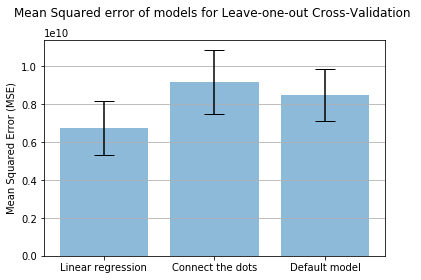

In [12]:

#Graph
names = ['Linear regression', 'Connect the dots','Default model']
x_pos = np.arange(len(names))
CTEs = [m1,m3,m2]
error = [b1,b3,b2]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
ax.set_title('Mean Squared error of models for Leave-one-out Cross-Validation ',y=1.08)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('MSE1.png')